_BloomTech Data Science, Unit 2_

---

👇 **Do not change the code in this cell.** If you're working in Google Colab, you can run this cell to install `category_encoders`.

In [1]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders

 
# Sprint Challenge: Predict Steph Curry's Shots 🏀

For your Sprint Challenge, you'll use a dataset with all Steph Curry's NBA field goal attempts from October 2009 through June 2019 (regular season and playoffs). The dataset was collected with the [nba_api](https://github.com/swar/nba_api) Python library.

You'll create a model to predict whether Curry will make a shot based on his past perfomance.

# Directions

This notebook contains 10 tasks, which cover the material we've learned in this sprint. Here's a summary:

- **Task 1:** Importing data.
- **Task 2:** Feature engineering.
- **Task 3:** Splitting data into a feature matrix and target vector.
- **Task 4:** Splitting data into training, validation, and test sets.
- **Task 5:** Establishing baseline accuracy.
- **Task 6:** Building a model with a transformer and a tree-based predictor.
- **Task 7:** Calculating training and validation accuracy.
- **Task 8 (`stretch goal`):** Tuning model hyperparameters.
- **Task 9:** Calculating precision and recall from a confusion matrix.
- **Task 10 (`stretch goal`):** Plotting a confusion matrix.

For each task you should do the following:

- Read the task instructions.
- Write your code in the cell below the task. Delete the `raise 
NotImplementedError` before your start.
- Run the testing cell below the task. If you get an error, read the error message and re-evaluate your code.

**You should limit your code to the following libraries:**

- `category_encoders`
- `numpy`
- `matplotlib`
- `pandas`
- `sklearn`



# I. Wrangle Data

**Task 1:** Change the code below to import your dataset. Be sure to examine the columns carefully and determine if one of them should be set at the index. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from pandas_profiling import ProfileReport
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
'''T1. Import DataFrame `df`'''

import pandas as pd
url = 'https://drive.google.com/uc?export=download&id=1fL7KPyxgGYfQDsuJoBWHIWwCAf-HTFpX'
df = pd.read_csv(url, parse_dates=['game_date'], index_col='game_date')
# YOUR CODE HERE

df.columns

Index(['game_id', 'game_event_id', 'player_name', 'period',
       'minutes_remaining', 'seconds_remaining', 'action_type', 'shot_type',
       'shot_zone_basic', 'shot_zone_area', 'shot_zone_range', 'shot_distance',
       'loc_x', 'loc_y', 'shot_made_flag', 'htm', 'vtm', 'season_type',
       'scoremargin_before_shot'],
      dtype='object')

In [4]:
df

,game_id,game_event_id,player_name,period,minutes_remaining,seconds_remaining,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot
game_date,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,11,25,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,GSW,HOU,Regular Season,2.0
2009-10-28,20900015,17,Stephen Curry,1,9,31,Step Back Jump shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,GSW,HOU,Regular Season,0.0
2009-10-28,20900015,53,Stephen Curry,1,6,2,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,141,Stephen Curry,2,9,49,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,GSW,HOU,Regular Season,-4.0
2009-10-28,20900015,249,Stephen Curry,2,2,19,Jump Shot,2PT Field Goal,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,GSW,HOU,Regular Season,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-05,41800403,570,Stephen Curry,4,8,1,Pullup Jump shot,2PT Field Goal,In The Paint (Non-RA),Center(C),8-16 ft.,12,3,120,1,GSW,TOR,Playoffs,-13.0
2019-06-05,41800403,573,Stephen Curry,4,7,16,Floating Jump shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,11,114,-5,0,GSW,TOR,Playoffs,-14.0
2019-06-05,41800403,602,Stephen Curry,4,5,27,Step Back Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-217,149,0,GSW,TOR,Playoffs,-17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13958 entries, 2009-10-28 to 2019-06-05
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   game_id                  13958 non-null  int64  
 1   game_event_id            13958 non-null  int64  
 2   player_name              13958 non-null  object 
 3   period                   13958 non-null  int64  
 4   minutes_remaining        13958 non-null  int64  
 5   seconds_remaining        13958 non-null  int64  
 6   action_type              13958 non-null  object 
 7   shot_type                13958 non-null  object 
 8   shot_zone_basic          13958 non-null  object 
 9   shot_zone_area           13958 non-null  object 
 10  shot_zone_range          13958 non-null  object 
 11  shot_distance            13958 non-null  int64  
 12  loc_x                    13958 non-null  int64  
 13  loc_y                    13958 non-null  int64  
 14  shot_

In [6]:
df['player_name'].value_counts()

Stephen Curry    13958
Name: player_name, dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
df['vtm'].value_counts()

GSW    7087
HOU     471
LAC     398
POR     398
OKC     397
CLE     364
SAS     343
MEM     316
PHX     301
DEN     298
MIN     283
LAL     280
NOP     265
UTA     262
SAC     225
DAL     222
TOR     187
WAS     168
NYK     168
CHI     165
PHI     157
DET     152
BOS     136
CHA     132
MIA     128
IND     125
ORL     121
MIL     117
BKN     110
ATL      93
NOH      58
NJN      31
Name: vtm, dtype: int64

In [9]:
df.shape

(13958, 19)

In [10]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

**Task 1 Testing**

In [11]:
'''T1 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 13958, 'Is `df` the correct length?'


**Task 2a:** Engineer at least 1 new feature. You can use something from the list below or your own idea.

- **Homecourt Advantage**: Is the home team (`htm`) the Golden State Warriors (`GSW`) ?
- **Opponent**: Who is the other team playing the Golden State Warriors?
- **Seconds remaining in the period**: Combine minutes remaining with seconds remaining, to get the total number of seconds remaining in the period.
- **Seconds remaining in the game**: Combine period, and seconds remaining in the period, to get the total number of seconds remaining in the game. A basketball game has 4 periods, each 12 minutes long.
- **Made previous shot**: Was Steph Curry's previous shot successful?

**Task 2b (`stretch goal — optional`):** Create a total of 3 new features, using your own ideas or the list above. Make sure you're not just duplicating features that are already in the feature matrix.

In [12]:
"""T2. Create new feature"""

# YOUR CODE HERE
df['s_remaining_period'] = df['seconds_remaining'] + df['minutes_remaining'] * 60
df['s_remaining_game'] = df['seconds_remaining'] + df['minutes_remaining'] * 60 + (4 - df['period']) *12 * 60
df.drop(columns = ['minutes_remaining', 'seconds_remaining'], inplace = True)

In [13]:
df['shot_type'] = np.where(df['shot_type'] == '2PT Field Goal', 2, 3)

In [14]:
df

,game_id,game_event_id,player_name,period,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot,s_remaining_period,s_remaining_game
game_date,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,Jump Shot,3,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,GSW,HOU,Regular Season,2.0,685,2845
2009-10-28,20900015,17,Stephen Curry,1,Step Back Jump shot,2,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,GSW,HOU,Regular Season,0.0,571,2731
2009-10-28,20900015,53,Stephen Curry,1,Jump Shot,2,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,GSW,HOU,Regular Season,-4.0,362,2522
2009-10-28,20900015,141,Stephen Curry,2,Jump Shot,2,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,GSW,HOU,Regular Season,-4.0,589,2029
2009-10-28,20900015,249,Stephen Curry,2,Jump Shot,2,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,GSW,HOU,Regular Season,0.0,139,1579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-05,41800403,570,Stephen Curry,4,Pullup Jump shot,2,In The Paint (Non-RA),Center(C),8-16 ft.,12,3,120,1,GSW,TOR,Playoffs,-13.0,481,481
2019-06-05,41800403,573,Stephen Curry,4,Floating Jump shot,2,Mid-Range,Right Side(R),8-16 ft.,11,114,-5,0,GSW,TOR,Playoffs,-14.0,436,436
2019-06-05,41800403,602,Stephen Curry,4,Step Back Jump shot,3,Above the Break 3,Left Side Center(LC),24+ ft.,26,-217,149,0,GSW,TOR,Playoffs,-17.0,327,327


In [15]:
df['shot_made_flag'].value_counts()

0    7357
1    6601
Name: shot_made_flag, dtype: int64

In [16]:
df['homecourt'] = np.where(df['htm'] == 'GSW', 1, 0)

In [17]:
df

,game_id,game_event_id,player_name,period,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,shot_made_flag,htm,vtm,season_type,scoremargin_before_shot,s_remaining_period,s_remaining_game,homecourt
game_date,,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,Jump Shot,3,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,0,GSW,HOU,Regular Season,2.0,685,2845,1
2009-10-28,20900015,17,Stephen Curry,1,Step Back Jump shot,2,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,1,GSW,HOU,Regular Season,0.0,571,2731,1
2009-10-28,20900015,53,Stephen Curry,1,Jump Shot,2,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,0,GSW,HOU,Regular Season,-4.0,362,2522,1
2009-10-28,20900015,141,Stephen Curry,2,Jump Shot,2,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,0,GSW,HOU,Regular Season,-4.0,589,2029,1
2009-10-28,20900015,249,Stephen Curry,2,Jump Shot,2,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,0,GSW,HOU,Regular Season,0.0,139,1579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-05,41800403,570,Stephen Curry,4,Pullup Jump shot,2,In The Paint (Non-RA),Center(C),8-16 ft.,12,3,120,1,GSW,TOR,Playoffs,-13.0,481,481,1
2019-06-05,41800403,573,Stephen Curry,4,Floating Jump shot,2,Mid-Range,Right Side(R),8-16 ft.,11,114,-5,0,GSW,TOR,Playoffs,-14.0,436,436,1
2019-06-05,41800403,602,Stephen Curry,4,Step Back Jump shot,3,Above the Break 3,Left Side Center(LC),24+ ft.,26,-217,149,0,GSW,TOR,Playoffs,-17.0,327,327,1


In [18]:
df.index[0] == df.index[1]

True

**Task 2 Test**

In [19]:
'''T2 Testing'''

assert df.shape[1] >= 20, '`df` does not appear to have new features.'


# II. Split Data

**Task 3:** Divide the DataFrame `df` into the feature matrix `X` and the target vector `y`. Your target is `'shot_made_flag'`.

In [20]:
'''T3. Create `X` and `y`.'''
# YOUR CODE HERE
target = 'shot_made_flag'
y = df[target]
X = df.drop(columns = target)

**Task 3 Test**

In [21]:
'''T3 Tests'''

assert y.shape == (13958,), '`y` either has the wrong number of rows, or is two-dimentional.'
assert len(X) == 13958, '`X` has the wrong number of rows.'
assert X.shape[1] > 1, '`X` has the wrong number of columns'
assert 'shot_made_flag' not in X.columns, 'Target is still part of feature matrix.' 

**Task 4:** Divide your dataset into training, validation, and test sets. 

- Your training set (`X_train`, `y_train`) should contain games from the 2009-10 season through the end of the 2016-17 season.
- Your validation set (`X_val`, `y_val`) should contain games from the 2017-18 season.
- Your test set (`X_test`, `y_test`) should contain games from the 2018-2019 season.
- **Tip:** The NBA season begins in October and ends in June.

In [22]:
cutoff1 = '2017-06-30'

X.index < cutoff1

array([ True,  True,  True, ..., False, False, False])

In [23]:
'''T4. Create training and val'''
# YOUR CODE HERE
cutoff1 = '2017-06-30'
mask1 = X.index < cutoff1
X_train, y_train = X.loc[mask1], y.loc[mask1]
X_test1, y_test1 = X.loc[~mask1], y.loc[~mask1]

cutoff2 = '2018-06-30'
mask2 = X_test1.index < cutoff2
X_val, y_val = X_test1.loc[mask2], y_test1.loc[mask2]
X_test, y_test = X_test1.loc[~mask2], y_test1.loc[~mask2]


In [24]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11081, 19), (11081,), (1168, 19), (1168,), (1709, 19), (1709,))

**Test 4**

In [25]:
'''T4 Tests'''
assert len(X_train) == len(y_train) == 11081
assert len(X_val) == len(y_val) == 1168
assert len(X_test) == len(y_test) == 1709


# III. Establish Baseline

**Task 5:** Establish the baseline accuracy score for this classification problem using your training set. Save the score to the variable `baseline_acc`.

In [26]:
'''T5. Calculate baseline accuracy `baseline_acc`.'''

# YOUR CODE HERE
baseline_acc = y_train.value_counts(normalize = True).max()
print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5272087356736757


**Task 5 Testing**

In [27]:
'''T5 Testing'''

assert isinstance(baseline_acc, float)
assert 0.0 <= baseline_acc <= 1.0


# IV. Build Model

**Task 6:** Build a model that includes (1) a transformer for categorical features and (2) a tree-based predictor. You should combine these two components (and any other pieces you think are necessary) in a pipeline named `model`. Be sure to fit your model to your training data.

In [28]:
'''T6. Build a pipeline `model` with encoder and tree-based predictor.'''

# YOUR CODE HERE
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(n_estimators = 300, n_jobs = -1, max_depth = 5, min_samples_leaf=5)
)
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['player_name', 'action_type',
                                      'shot_zone_basic', 'shot_zone_area',
                                      'shot_zone_range', 'htm', 'vtm',
                                      'season_type'],
                                mapping=[{'col': 'player_name',
                                          'data_type': dtype('O'),
                                          'mapping': Stephen Curry    1
NaN             -2
dtype: int64},
                                         {'col': 'action_type',
                                          'data_type': dtype('O'),
                                          'mapping': Jump Shot                              1
Step Back Jump shot                    2
Pullup Jump sho...
CLE    15
MIA    16
MIL    17
CHI    18
DEN    19
NJN    20
NOH    21
CHA    22
OKC    23
DAL    24
UTA    25
ATL    26
PHI    27
DET    28
TOR    29
NYK    30
BKN    31
NOP  

**Task 6 Testing**

In [29]:
'''T6 Testing'''

from sklearn.pipeline import Pipeline
assert isinstance(model, Pipeline), '`model` should be type `Pipeline`.'

# Does `model` Pipeline have multiple components?
assert len(model.named_steps.keys()) > 1, '`model` should have more than one component.'

# Has `model` been trained?
assert hasattr(model, 'classes_'), 'Have you trained `model`?'


# V. Check Metrics

**Task 7:** Check the training and validation accuracy of your model, and assign the scores to `train_acc` and `val_acc` respectively.

In [30]:
X_train

,game_id,game_event_id,player_name,period,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,htm,vtm,season_type,scoremargin_before_shot,s_remaining_period,s_remaining_game,homecourt
game_date,,,,,,,,,,,,,,,,,,,
2009-10-28,20900015,4,Stephen Curry,1,Jump Shot,3,Above the Break 3,Right Side Center(RC),24+ ft.,26,99,249,GSW,HOU,Regular Season,2.0,685,2845,1
2009-10-28,20900015,17,Stephen Curry,1,Step Back Jump shot,2,Mid-Range,Left Side Center(LC),16-24 ft.,18,-122,145,GSW,HOU,Regular Season,0.0,571,2731,1
2009-10-28,20900015,53,Stephen Curry,1,Jump Shot,2,In The Paint (Non-RA),Center(C),8-16 ft.,14,-60,129,GSW,HOU,Regular Season,-4.0,362,2522,1
2009-10-28,20900015,141,Stephen Curry,2,Jump Shot,2,Mid-Range,Left Side(L),16-24 ft.,19,-172,82,GSW,HOU,Regular Season,-4.0,589,2029,1
2009-10-28,20900015,249,Stephen Curry,2,Jump Shot,2,Mid-Range,Left Side Center(LC),16-24 ft.,16,-68,148,GSW,HOU,Regular Season,0.0,139,1579,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-12,41600405,500,Stephen Curry,4,Driving Finger Roll Layup Shot,2,Restricted Area,Center(C),Less Than 8 ft.,0,0,8,GSW,CLE,Playoffs,10.0,272,272,1
2017-06-12,41600405,503,Stephen Curry,4,Reverse Layup Shot,2,Restricted Area,Center(C),Less Than 8 ft.,1,-7,11,GSW,CLE,Playoffs,12.0,253,253,1
2017-06-12,41600405,527,Stephen Curry,4,Jump Shot,3,Above the Break 3,Center(C),24+ ft.,28,1,283,GSW,CLE,Playoffs,11.0,97,97,1


In [31]:
'''T7. Calculate train and test accuracy.'''

# YOUR CODE HERE
train_acc = model.score(X_train, y_train)
val_acc = model.score(X_val, y_val)
print('Training Accuracy Score:', train_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.6725927262882412
Validation Accuracy Score: 0.6138698630136986


**Task 7 Test**

In [32]:
'''T7 Testing'''

# Is `training_acc` a float between 0.0 and 1.0?
assert isinstance(train_acc, float)
assert 0.0 <= train_acc <= 1.0

# Is `validation_acc` a float between 0.0 and 1.0?
assert isinstance(val_acc, float)
assert 0.0 <= val_acc <= 1.0


# VI. Tune Model

**Task 8 (`stretch goal — optional`):** Using your training and validation sets as a guide, tune the hyperparameters of your model to see if you can improve its accuracy. You can perform your tuning "by hand" or using [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

- Important hyperparameters for all tree-based models: `max_depth`.
- Important hyperparameters for random forest models: `n_estimators`, `max_samples`. 
- Important hyperparametes for gradient boosting tree models: `n_estimators`, `learning_rate`.
- **TIP:** If you use `RandomizedSearchCV`, set `n_iter` to `3`. Any larger and the auto-grader will stop working.
- **TIP:** Since you already created a validation set above, there is no need to do k-fold cross-validation here. Set `cv` to `None`.

Once you're satisfied with your model's performance on the validation set (if you can get above `0.6`, you're doing good), calculate its accuracy with your test set. Assign the result to `test_acc`.

In [33]:
'''T8. Tune model.'''
clf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 42, n_jobs = -1)
)


param_grid = {
    'simpleimputer__strategy' : ['mean', 'median'],
    'randomforestclassifier__n_estimators' : range(100, 400, 50), 
    'randomforestclassifier__min_samples_split' : range(5, 20, 5),
    'randomforestclassifier__min_samples_leaf' : range(5, 40, 5)
    }

# YOUR CODE HERE
model_r = RandomizedSearchCV(
    clf,
    param_distributions = param_grid,
    n_jobs=-1,
    cv=None,
    verbose=1,
    n_iter = 3
)

model_r.fit(X_train, y_train)

test_acc = model_r.best_score_
print(model_r.best_params_)
print(model_r.best_score_)

print('Testing Accuracy Score:', test_acc)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'simpleimputer__strategy': 'mean', 'randomforestclassifier__n_estimators': 250, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__min_samples_leaf': 35}
0.6594149409958167
Testing Accuracy Score: 0.6594149409958167


**Task 8 Testing**

In [34]:
'''T8 Testing'''
assert isinstance(test_acc, float)
assert 0.0 <= test_acc <= 1.0

# VII. Communication

**Task 9:** Below is a confusion matrix for the model that your instructor made for this challenge (based on the **test data**). Calculate the precision and recall of this model, naming them `instructor_precision` and `instructor_recall`, respectively.

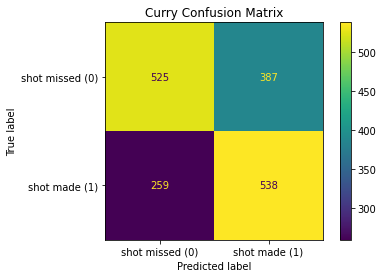

In [35]:
'''T9. Calculate precision and recall'''
# YOUR CODE HERE
# precision: Of all the pumps that you predicted as needing repair, what proportion actually needed repair?
#recall: Of those pumps that actually needed repair, what proportion did you correctly predict as needing repair?
instructor_precision = 538/(538 + 378)
instructor_recall = 538/(259 + 538)
print('Instuctor model precision', instructor_precision)
print('Instuctor model recall', instructor_recall)

Instuctor model precision 0.5873362445414847
Instuctor model recall 0.6750313676286073


**Task 9 Testing**

In [36]:
'''T9 Testing'''
assert isinstance(instructor_precision, float)
assert isinstance(instructor_recall, float)
assert 0 <= instructor_precision <= 1
assert 0 <= instructor_recall <= 1

**Task 10 (`stretch goal — optional`):** Plot confusion matrix for your model using your **test data**.

In [38]:
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    RandomForestClassifier(n_estimators = 300, n_jobs = -1, max_depth = 5, min_samples_leaf=35, min_samples_split = 5)
)
model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['player_name', 'action_type',
                                      'shot_zone_basic', 'shot_zone_area',
                                      'shot_zone_range', 'htm', 'vtm',
                                      'season_type'],
                                mapping=[{'col': 'player_name',
                                          'data_type': dtype('O'),
                                          'mapping': Stephen Curry    1
NaN             -2
dtype: int64},
                                         {'col': 'action_type',
                                          'data_type': dtype('O'),
                                          'mapping': Jump Shot                              1
Step Back Jump shot                    2
Pullup Jump sho...
DEN    19
NJN    20
NOH    21
CHA    22
OKC    23
DAL    24
UTA    25
ATL    26
PHI    27
DET    28
TOR    29
NYK    30
BKN    31
NOP    32
NaN    -2
dtype: int64},
          

In [39]:
X_test

,game_id,game_event_id,player_name,period,action_type,shot_type,shot_zone_basic,shot_zone_area,shot_zone_range,shot_distance,loc_x,loc_y,htm,vtm,season_type,scoremargin_before_shot,s_remaining_period,s_remaining_game,homecourt
game_date,,,,,,,,,,,,,,,,,,,
2018-10-16,21800002,10,Stephen Curry,1,Step Back Jump shot,3,Above the Break 3,Right Side Center(RC),24+ ft.,24,226,90,GSW,OKC,Regular Season,0.0,691,2851,1
2018-10-16,21800002,58,Stephen Curry,1,Driving Floating Jump Shot,2,In The Paint (Non-RA),Center(C),Less Than 8 ft.,6,-2,63,GSW,OKC,Regular Season,4.0,477,2637,1
2018-10-16,21800002,131,Stephen Curry,1,Driving Layup Shot,2,Restricted Area,Center(C),Less Than 8 ft.,2,5,29,GSW,OKC,Regular Season,4.0,226,2386,1
2018-10-16,21800002,141,Stephen Curry,1,Driving Reverse Layup Shot,2,Restricted Area,Center(C),Less Than 8 ft.,1,-6,18,GSW,OKC,Regular Season,7.0,178,2338,1
2018-10-16,21800002,145,Stephen Curry,1,Jump Shot,3,Left Corner 3,Left Side(L),24+ ft.,22,-228,8,GSW,OKC,Regular Season,7.0,169,2329,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-05,41800403,570,Stephen Curry,4,Pullup Jump shot,2,In The Paint (Non-RA),Center(C),8-16 ft.,12,3,120,GSW,TOR,Playoffs,-13.0,481,481,1
2019-06-05,41800403,573,Stephen Curry,4,Floating Jump shot,2,Mid-Range,Right Side(R),8-16 ft.,11,114,-5,GSW,TOR,Playoffs,-14.0,436,436,1
2019-06-05,41800403,602,Stephen Curry,4,Step Back Jump shot,3,Above the Break 3,Left Side Center(LC),24+ ft.,26,-217,149,GSW,TOR,Playoffs,-17.0,327,327,1


In [40]:
y_test

game_date
2018-10-16    1
2018-10-16    1
2018-10-16    1
2018-10-16    0
2018-10-16    1
             ..
2019-06-05    1
2019-06-05    0
2019-06-05    0
2019-06-05    0
2019-06-05    0
Name: shot_made_flag, Length: 1709, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


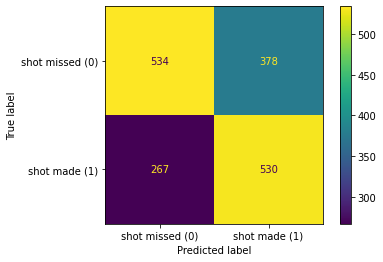

In [41]:
'''T10. Plot ROC curve.'''
# YOUR CODE HERE
plot_confusion_matrix(
    model,
    X_test,
    y_test,
    values_format = '.0f',
    display_labels = ['shot missed (0)', 'shot made (1)']
)